In [1]:
import pandas as pd
import numpy as np

# Predicting heart disease using machine learning

This notebook looks using various Python-based machine learning and data science libraries in an attempt to bulid a machine learning model capable of predicting weather or not someone has heart disease based on their medical attribute

We'r going to take the following steps:
1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation

## 1.Problem Defination

In a statement
> Given clinical parameters about a patient ,can we predict weather or not they have heart disease?

## 2. Data
The original data come from the Cleavland data from the UCI Machine learning Repository.https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it avaliable on kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

## 3.Evaluation

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4.Features

This is where you'll get different information about each the features data.

**create data dictionary**



* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
  0: Typical angina: chest pain related decrease blood   supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
  above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
  0: Nothing to note
  1: ST-T Wave abnormality
  can range from mild symptoms to severe problems
  signals non-normal heart beat
  2: Possible or definite left ventricular hypertrophy
  Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
  0: Upsloping: better heart rate with excercise (uncommon)
  1: Flatsloping: minimal change (typical healthy heart)
  2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
  colored vessel means the doctor can see the blood passing through
  the more blood movement the better (no clots)
* thal - thalium stress result
  1,3: normal
  6: fixed defect: used to be defect but ok now
  7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas ,Mathplotlib and Numpy for data analysis and manipulation.  

In [2]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## load Data

In [3]:
df =pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# let's find how many of each classes there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

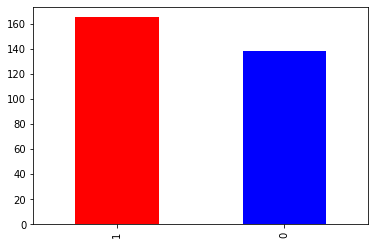

In [6]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
## are there any  missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
## Heart Disease Frequency according to Sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
## Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


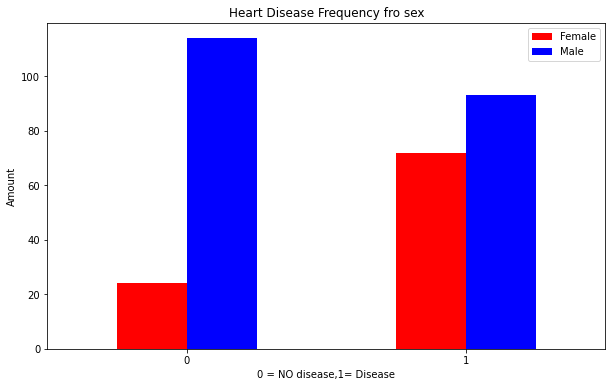

In [12]:
## Create a plot of Crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["red","blue"])
plt.title("Heart Disease Frequency fro sex")
plt.xlabel("0 = NO disease,1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);



## Age Vs Max. Heart Rate for HeartDisease

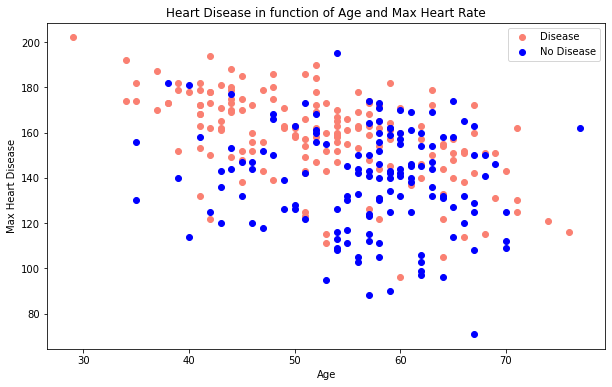

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon")
           
    
# Scatter with negative example 
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="blue")
           
 ## ADD some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Disease")
plt.legend(["Disease","No Disease"])

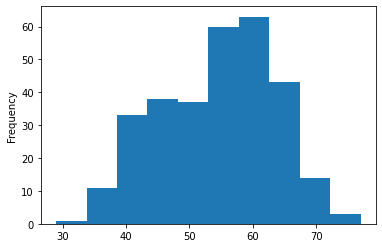

In [14]:
df.age.plot.hist();

## Herat Disease Frequency per chest Pain Type
cp - chest pain type 

0 : Typical angina: chest pain related decrease blood supply to the heart 

1 : Atypical angina: chest pain not related to heart 

2: Non-anginal pain: typically esophageal spasms (non heart related) 

3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


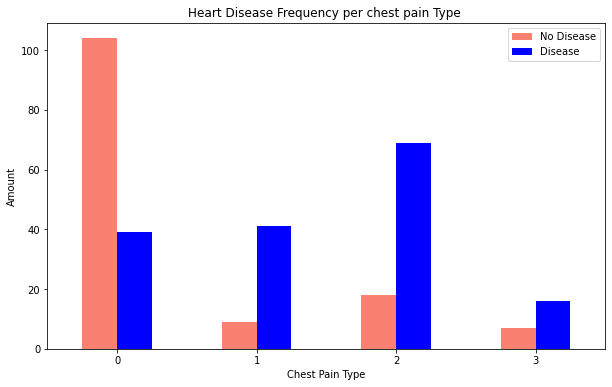

In [16]:
# Make the Cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["salmon","blue"],figsize=(10,6))

#  Add some communication
plt.title("Heart Disease Frequency per chest pain Type ")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

## Buliding co-relation of matrix

In [17]:
# Making co-relation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


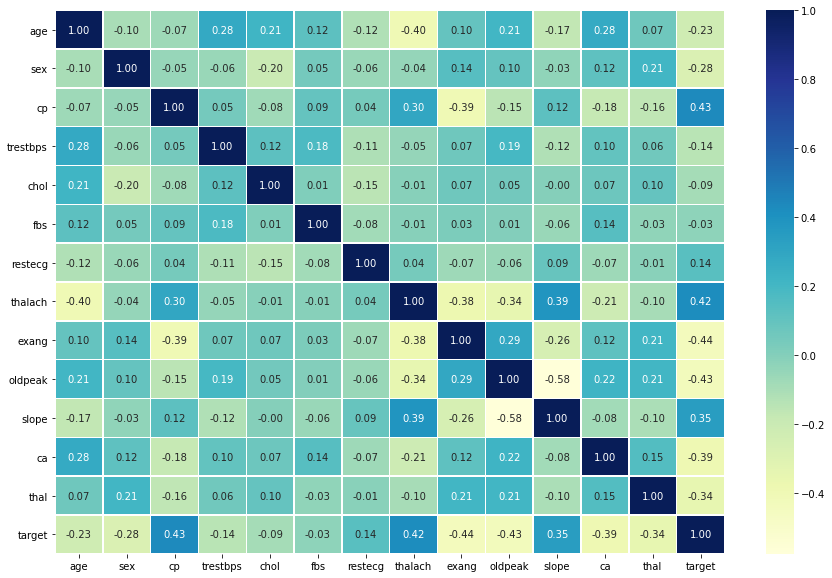

In [18]:
# Let's make our co-relation matrix a little prettier
corr_matrix =df.corr()
fig,ax =plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");


 # 5 Modeling

In [19]:
# split the data
X= df.drop("target",axis=1)
y= df["target"]

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# split using train and test sets
np.random.seed(42)

# split into tarin & test model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



In [22]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

 Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

* Logistic Regression - LogisticRegression()
* K-Nearest Neighbors - KNeighboursClassifier()
* RandomForest - RandomForestClassifier()

In [23]:
# Put models in a dictionary
models= {"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluate given machine models.
    models :a dict of different Scikit-Learn machine learning models
    X_train :training data (no labels)
    X_test: tseting data(no labels)
    y_train : traning labels
    y_test : Testing labels
    """
    # Set Random Seed
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores ={}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores
    

In [27]:
model_scores =fit_and_score(models=models,
                           X_train=X_train,
                            X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparision

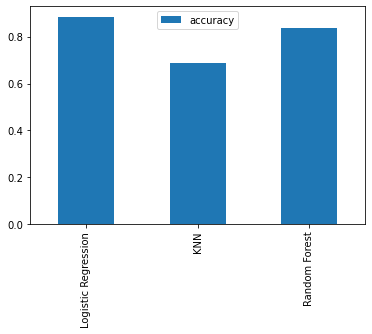

In [32]:
model_compare =pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got  baeline model ... and we know a model's first predicition aren't always what we should based our next steps off. what should do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-Validation
* Precission
* Recall 
* F1 score
* Classification Report
* ROC curve
* Area Under the Curve (AUC)

 # Hyperparameter tuning

In [36]:
# Let's Tune KMN
train_scores =[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbors =range(1,21)

#Setup KNK instance
knn= KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the Training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Updating the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data :75.41%


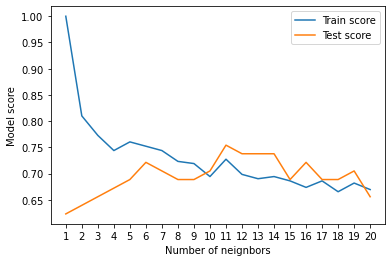

In [44]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neignbors")
plt.ylabel("Model score")

plt.legend()

print(f"Maximum KNN score on the test data :{max(test_scores)*100:.2f}%");

# Hyper parameter tuning with RandomizedsearchCV

We're going to tune :
* LogesticRegression()
* RandomForestClassifier()

... Using RandomSearchCV

In [54]:
# Create a ahyper Parameter usinfg logesticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

# Create a hyper parameters  grid fro RandomForestClassifer
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameters grids setup for each of our model .let's tune them using RandomizedSearchCV..

In [49]:
# now lets tune the model

# set seed
np.random.seed(42)

# setup random Hyperparaters search fro LogesgicRegression

rs_log_reg =RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                            verbose=True)
# FIT random Hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [52]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we do its for Random Forest Classifier

In [56]:
# now lets tune the model

# set seed
np.random.seed(42)

# setup random Hyperparaters search for RandomForestClassifier

rs_rf =RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                            verbose=True)
# Fit random Hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   55.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [58]:
# Find best Paramaters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [60]:
# Evulate the Randomized Search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparamters Using Grid Search CV
 
For LogisticRegression 

In [63]:
log_reg_grid ={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

# Setup grid hyperparametes search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid Hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


In [64]:
# Check for best Params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [65]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

# Evaluating our tuned machine Learning classifier, beyond accuracy


* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()
 ... qand it would be great if cross-validation was used where possible
    
    
     We need to predict first we need to make predicitions

In [66]:
# Make predicitions with tunned model
y_preds= gs_log_reg.predict(X_test)

In [67]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

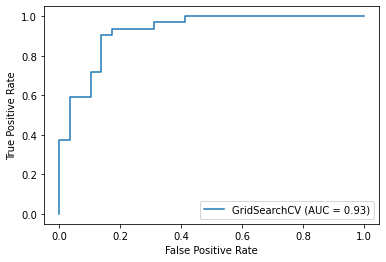

In [69]:
# Import ROC function from Plot_roc_Curve and sklearn.metrics

# Plot ROC curve and Calculate and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)

In [70]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


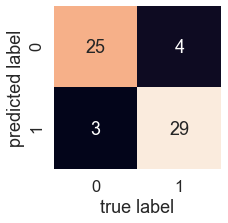

In [73]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plot  a nice looking Confusion matrix using Sea Born's Heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

Classification Report as well as Cross_valadation precision,recall and F1-score

In [75]:
# Show classification report
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation mertics using cross-validation
we're going to calculate precision ,recall adn f1-score of our model using -valadition and to do so we'll be using cross_val_score().

In [76]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [77]:
# Creating a new Clasifier with best Parameters
clf =LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [85]:
# Cross_validated accuracy
cv_acc =cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [86]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8446994535519124

In [88]:
# Cross_validated precision
cv_precision =cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [89]:
# Cross_validated recall
cv_recall =cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [90]:
# Cross_validated f1-score
cv_f1 =cross_val_score(clf,
                       X,y,
                       cv=5,
                       scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

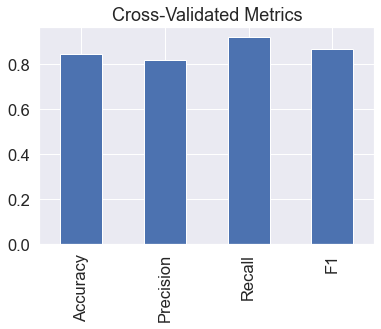

In [93]:
# Visualize cross_validated metrics
cv_metrics =pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature Importance

Feature importance is another as asking ."which  feature contributed most to the outcome of the model and how did they contributed?"

Finding features imortance  is different for each machine learning model. One Way to find  feture importance is to MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression Model...

In [96]:
# Fit aa instance of logisticRegression

clf =LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

clf.fit(X_train,y_train);

In [103]:
# Check coef_
clf.coef_ ## This gives us an idae of how much each column is contributing for predicting the output

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [100]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

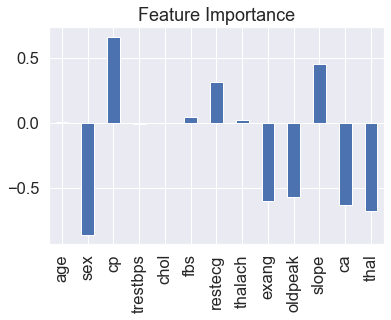

In [102]:
# Visualize feature importance
feature_df =pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [104]:

pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [105]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Exprementation
 If you haven't hit evaluation metrics yet ... ask yourself..

* Could you collect more data?

* Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.

* Could you improve the current models (beyond what we've done so far)?

* If your model is good enough, how would you export it and share it with others? (Hint: check out Scikit-Learn's documentation on model persistance)